# PROJECT 2: HEUN'S METHOD
## Abstract
In this project, I modelled the projectile motion of a baseball including the effect of drag force, using the Heun's method. The maximum altitude and range calculated by this model turned out to be 107.3m and 609.45m respectively. I decided to confirm the validity of Heun's method by comparing it to the analytical physics results. To accomplish this, the drag coefficient, C, was set to zero because the analytical physics method doesn't take drag force into consideration. With this i got a percentage error of maximum altitude and range to be 0.0023% and 0.59% respectively when comparing the results from Heun's method to the analytical physics results.
## Description
Heun's method may refer to the improved or modified Euler's method, or a similar two-stage Runge–Kutta method. It is named after Karl Heun and is a numerical procedure for solving ordinary differential equations with a given initial value. The Euler method has a serious flaw in its approach to determining the slope to use in taking each step of the iteration. The iteration step from $x_i$ to $x_{i+1}$ uses only the slope at the endpoint $x_i$ of the interval. Heun's Method has a general formula: $$s_3 = s_1 + \frac{1}{2}(f_1 + f_2) \Delta x$$ Heun's method involves evaluating the slope, $f(s,x)$, at $s_0$, extrapolating out to $x_1 + \Delta x$, finding $s_1$, using the value of $s_1$ evaluate the slope, $f(s_1,x_1)$. One would notice that the value of the first slope underestimated the change in s, while the value of the second slope overestimated the change in s. Heun's method requires you to find the average of these slopes and use it to find the actual next value of s. This method is more accurate the Euler's.
## Algorithm and Discussion
I am modeling a baseball in flight, but including the effect of air drag. I assumed the baseball was launched with an initial speed of 80 m/s in a direction 35 degrees above the horizontal. The magnitude of the drag force is given by:
$$ f_d = \frac{1}{2} C_d A \rho v^2 $$
Where $C_d$ is the drag coefficient (around 1), $A$ is the cross sectional area of the ball, $\rho$ is the density of the air and $v$ is the speed of the ball (magnitude of velocity).

I used Heun's method to find the trajectory of the ball and, in particular, the maximum altitude and range (distance from the batter where the ball reaches the ground). In addition to the velocity of the baseball, i also want to track the position. I did this by applying the concept of coupled equations. Where i defined the state as not just the velocity, but include both the velocity and the position. Position and the velocity are related by yet another first order differential equation:
$$\frac{dy}{dt} = v$$
So introduced the position $y$ by adding a second first order equation to our system. Position and velocity will both be two component vectors because the baseball was launched at an angle, so the state vector, s = array([y, v]), will have four components over all. 
## Implementation and code

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as pl 
import numpy as np

Total time:  4.799999999999999
Maximum altitude:  29.68278074336941
Range:  308.00116865266085


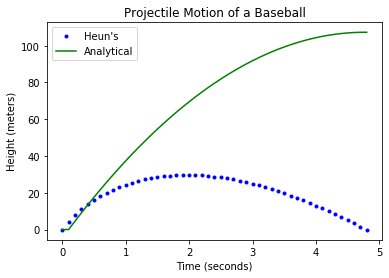

In [2]:
y0 = 0.0             #m
x0 = 0.0             #m
v0 = 80.0            #m/s
vx = v0*np.cos(35.0 * (np.pi/180.0))    #m/s
vy = v0*np.sin(35.0 * (np.pi/180.0))    #m/s
m = 0.145 #kg
dt = 0.1
C = 1
t= 0.0
A = 0.0042
rho = 1.3  #kg/m^3
g = np.array([0, -9.81])
s = np.array([x0, y0, vx, vy])
def derivs(s, t):
    Position = s[0:2]   
    Velocity = s[2:4]   
    drdt = Velocity 
    f_drag = -0.5 * C * A * rho * np.sqrt((Velocity * Velocity).sum()) * Velocity
    dvdt = ((m * g) + f_drag) / m
    return np.array([Velocity[0], Velocity[1], dvdt[0], dvdt[1]])
ylist = [y0]
tlist = [t]
y2list = [y0] 
xlist = [x0]
maxhmaxt =[0,0]

def HeunStep(s, t, derivs, dt):
    f1=derivs(s,t)
    f2=derivs(s+f1*dt,t+dt)
    return s + 0.5*(f1+f2)*dt
while s[1] >= 0:
    s = HeunStep(s, t, derivs, dt)
    y = (0.5*g[1]*t*t)+(vy*t)      
    x = vx*t
    t = t + dt
    ylist.append(s[1])
    y2list.append(y)
    tlist.append(t)
    if (s[1] > maxhmaxt[0]):
        maxhmaxt = [s[1],t]
    if (s[1] <= 0):
        print("Total time: ",t)
print("Maximum altitude: ",maxhmaxt[0])
print("Range: ",x)
pl.xlabel("Time (seconds)")
pl.ylabel("Height (meters)")
pl.title("Projectile Motion of a Baseball")
pl.plot(tlist, ylist,'b.', label = "Heun's")
pl.plot(tlist, y2list,'g-', label = "Analytical")
pl.legend()


The graph above shows the result of Heun's method and Analytical method. We can see that they don't match because heun's method accounted for drag while the analytical method didn't account for this. We can confirm if results from Heun's method would match the analytical results if we ignore the effect of drag by setting C equal to zero.

Total time:  9.399999999999983
Maximum altitude:  107.31329006799318
Range:  609.4491209510087


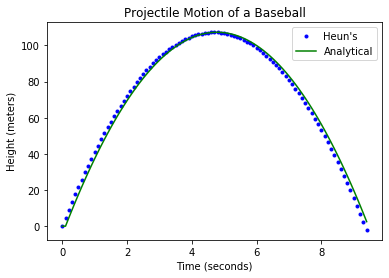

In [3]:
C = 0
t= 0.0
A = 0.0042
rho = 1.3  #kg/m^3
g = np.array([0, -9.81])
s = np.array([x0, y0, vx, vy])
def derivs(s, t):
    Position = s[0:2]   
    Velocity = s[2:4]   
    drdt = Velocity 
    f_drag = -0.5 * C * A * rho * np.sqrt((Velocity * Velocity).sum()) * Velocity
    dvdt = ((m * g) + f_drag) / m
    return np.array([Velocity[0], Velocity[1], dvdt[0], dvdt[1]])
ylist = [y0]
tlist = [t]
y2list = [y0] 
xlist = [x0]
maxhmaxt =[0,0]

def HeunStep(s, t, derivs, dt):
    f1=derivs(s,t)
    f2=derivs(s+f1*dt,t+dt)
    return s + 0.5*(f1+f2)*dt
while s[1] >= 0:
    s = HeunStep(s, t, derivs, dt)
    y = (0.5*g[1]*t*t)+(vy*t)      
    x = vx*t
    t = t + dt
    ylist.append(s[1])
    y2list.append(y)
    tlist.append(t)
    if (s[1] > maxhmaxt[0]):
        maxhmaxt = [s[1],t]
    if (s[1] <= 0):
        print("Total time: ",t)
print("Maximum altitude: ",maxhmaxt[0])
print("Range: ",x)
pl.xlabel("Time (seconds)")
pl.ylabel("Height (meters)")
pl.title("Projectile Motion of a Baseball")
pl.plot(tlist, ylist,'b.', label = "Heun's")
pl.plot(tlist, y2list,'g-', label = "Analytical")
pl.legend()


We can see that after ignoring the effect of drag force in Heun's method, The heun's method graph it matched up with the results from the analytical method to a high degree. We can calculate the analytical values for maximum altitude, range, and time of flight using the projectile formula:
$$ Range  = \frac {(V_0)^2 sin(2\theta)}{g} $$
$$ Maximum Height  = \frac{(V_0)^2 sin^2(\theta)}{2g} $$
$$ Time of flight  = \frac{2V_0 sin(\theta)}{g} $$
From these values we can figure out the error in Heun's method's calculations

In [4]:
Range_analytical = np.abs(v0**2*np.sin((35.0*2) * (np.pi/180.0)) / (g[1]))

In [5]:
max_heightanalytical = np.abs((v0**2)*np.sin(35.0 * (np.pi/180.0))**2 / (2 * g[1]))

In [6]:
Time_analytical = np.abs((2 * v0) * np.sin(35.0 * (np.pi/180.0)) / (g[1]))

In [7]:
print (Range_analytical)
print (max_heightanalytical)
print (Time_analytical)

613.0512510733754
107.31577682761771
9.35496736148495


In [8]:
error_range = Range_analytical - x
error_maxheight = max_heightanalytical - maxhmaxt[0]
error_time  = Time_analytical - t
print(error_range)
print(error_maxheight)
print(abs(error_time))

3.6021301223667024
0.002486759624531487
0.04503263851503192


In [9]:
error_percentrange = ((error_range)/(Range_analytical))*100
error_percentmaxheight = ((error_maxheight)/(max_heightanalytical))*100
error_percenttime = ((abs(error_time))/(Time_analytical))*100
print ("Percentage error in Range:", error_percentrange)
print("Percentage error in Maximum Height: ", error_percentmaxheight)
print("Percentage error in Time: ", error_percenttime)

Percentage error in Range: 0.5875740594379062
Percentage error in Maximum Height:  0.002317235823140889
Percentage error in Time:  0.48137675712728206


## Conclusion
The purpose of this lab was to predict a baseball's motion, including the effect of drag, with Heun's method and confirm its validity. I used Analytical physics formulas to confirm its validity, but because analytical physics in kinetics neglects the effect of drag force i had to check Heun's method with drag force neglected and see if results obtained were close to the results from analytical physics. I got a percentage error of maximum altitude and range to be 0.0023% and 0.59% respectively when comparing Heun's method's results to the analytical physics results.